# Neural Foundations

## Hebbian Learning Rule
> *Cells (neurons) that fire together, wire together.*

The mathematical update rule is:

$$
\Delta w = \eta \cdot x \cdot y
$$

Where:

- $\Delta w$ = change in weight
- $\eta$ = learning rate
- $x$ = input neuron activation
- $y$ = output neuron activation

Weight update equation:

$$
w_{new} = w_{old} + \eta \cdot x \cdot y
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([
    [1, 1, 0],
    [1, 1, 0],
    [1, 1, 0],
    [0, 0, 1]
])

print(f"Input X {X}")

# weights = np.random.randn(3) * 0.1
weights = np.ones(3)

learning_rate = 0.1

print(f"weights {weights}")

### Define Neuron Output

The neuron output is a weighted sum:

$$
y = \sum_i w_i x_i
$$

In [ ]:
def neuron_output(x, w):
    return np.dot(x, w)

In [ ]:
# Weights increase when input and output activate together.
for epoch in range(5):
    for x in X:
        y = neuron_output(x, weights)
        weights += learning_rate * x * y

    print(f"Epoch {epoch+1} weights:", weights)

In [ ]:
print(neuron_output(np.array([0, 0, 1]), weights))
print(neuron_output(np.array([1, 1, 0]), weights))

It discovered dominant patterns automatically.

- Frequently co‑activated inputs gain stronger weights.
- The system learns correlations without labels.
- This is **unsupervised learning**.
----
- But there is no error correction
- It cannot distinguish useful vs useless features.


## Perceptron Model

The perceptron computes:

$$
y = \text{sign}(w_1x_1 + w_2x_2 + b)
$$

Weight update rule:

$$
w \leftarrow w + \eta (t - y)x
$$

Where:

- $x$ = input vector
- $w$ = weights
- $b$ = bias
- $t$ = target label
- $\eta$ = learning rate

<p align="center">
  <img src="../imgs/single_perceptron.png" width="400">
</p>

### AND Gate

Single perceptron = linear decision boundary

In [ ]:
class Perceptron:
    def __init__(self, lr=0.1, epochs=10):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        # this weights will be tune in a such way that it will learn AND gate
        self.weights = np.random.randn(X.shape[1]) * 0.1
        self.bias = 0

        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                output = self.predict(xi)
                update = self.lr * (target - output)
                self.weights += update * xi
                self.bias += update

    # during predictions dot product between the trained weights and input
    def predict(self, x):
        linear_output = np.dot(x, self.weights) + self.bias
        return 1 if linear_output >= 0 else 0

In [ ]:
# Input
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

# Output
y_and = np.array([0,0,0,1])

In [ ]:
p_and = Perceptron(epochs=20)
p_and.fit(X, y_and)

print('AND Predictions:')
for x in X:
    print(x, '->', p_and.predict(x))

## OR Gate

In [ ]:
y_or = np.array([0,1,1,1])

In [ ]:
p_or = Perceptron(epochs=20)
p_or.fit(X, y_or)

print('OR Predictions:')
for x in X:
    print(x, '->', p_or.predict(x))

## XOR Gate

XOR is **not linearly separable**, so a single perceptron cannot learn it.

In [ ]:
y_xor = np.array([0,1,1,0])

In [ ]:
p_xor = Perceptron(epochs=50)
p_xor.fit(X, y_xor)

print('XOR Predictions (Failure Expected):')
for x in X:
    print(x, '->', p_xor.predict(x))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))

# Plotting points for output 0
plt.scatter(X[y_xor == 0, 0], X[y_xor == 0, 1], color='red', marker='o', label='Output 0')
# Plotting points for output 1
plt.scatter(X[y_xor == 1, 0], X[y_xor == 1, 1], color='blue', marker='x', label='Output 1')

plt.title('XOR Gate Visualization')
plt.xlabel('Input X1')
plt.ylabel('Input X2')
plt.grid(True)
plt.legend()
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0.5, color='gray', linestyle='--', linewidth=0.8)
plt.show()

The points corresponding to an output of 0 (red circles) and an output of 1 (blue crosses) cannot be separated by a single straight line.

- AND and OR are **linearly separable** → perceptron succeeds.
- XOR is **not linearly separable** → perceptron fails.

This limitation led to multi-layer neural networks and backpropagation.

### The solution below is the part of second era after the first AI Winter solved using Chain Rule to train the hidden layer.

# 2‑Layer MLP Solving XOR (Manual Backpropagation)

<p align="center">
  <img src="../imgs/XOR_MLP.jpg" width="400">
</p>

This demonstrates **why hidden layers + non‑linearity solved the XOR problem**.

We implement a **2‑layer neural network from scratch** using NumPy.

## Network Architecture

Input → Hidden → Output

$$
X \rightarrow W_1,b_1 \rightarrow \sigma() \rightarrow W_2,b_2 \rightarrow \sigma() \rightarrow \hat{y}
$$

- Input layer: 2 neurons
- Hidden layer: 2 neurons
- Output layer: 1 neuron


## Backpropagation Equations

Forward pass:
$$ z_1 = XW_1 + b_1 $$
$$ a_1 = \sigma(z_1) $$
$$ z_2 = a_1W_2 + b_2 $$
$$ \hat{y} = \sigma(z_2) $$

Loss:
$$ L = \frac{1}{2}(y - \hat{y})^2 $$

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

### Activation function

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return x*(1-x)

### Initialize Parameters

In [4]:
np.random.seed(2)
W1 = np.random.randn(2,2)
b1 = np.zeros((1,2))

W2 = np.random.randn(2,1)
b2 = np.zeros((1,1))

lr = 0.1 # Reduced learning rate


### Training Loop

In [5]:
losses = []

for epoch in range(6000):
    # forward pass
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)

    z2 = a1 @ W2 + b2
    y_hat = sigmoid(z2)

    loss = np.mean((y - y_hat)**2)
    losses.append(loss)

    # backward pass
    dL_dyhat = (y_hat - y)
    dL_dz2 = dL_dyhat * sigmoid_derivative(y_hat)

    dW2 = a1.T @ dL_dz2
    db2 = np.sum(dL_dz2, axis=0, keepdims=True)

    dL_da1 = dL_dz2 @ W2.T
    dL_dz1 = dL_da1 * sigmoid_derivative(a1)

    dW1 = X.T @ dL_dz1
    db1 = np.sum(dL_dz1, axis=0, keepdims=True)

    # weight update
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.3025
Epoch 1000, Loss: 0.1853
Epoch 2000, Loss: 0.1545
Epoch 3000, Loss: 0.1401
Epoch 4000, Loss: 0.0558
Epoch 5000, Loss: 0.0165


### Predictions After Training

In [22]:
# Forward pass with trained weights
z1_test = X @ W1 + b1
a1_test = sigmoid(z1_test)

z2_test = a1_test @ W2 + b2
y_hat_test = sigmoid(z2_test)

# Convert probabilities to binary predictions
predictions_mlp = (y_hat_test > 0.5).astype(int)

# Print inputs and their corresponding predictions
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted Output: {predictions_mlp[i][0]}, Actual Output: {y[i][0]}")

Input: [0 0], Predicted Output: 0, Actual Output: 0
Input: [0 1], Predicted Output: 1, Actual Output: 1
Input: [1 0], Predicted Output: 1, Actual Output: 1
Input: [1 1], Predicted Output: 0, Actual Output: 0


## Visualize the Decision Boundary

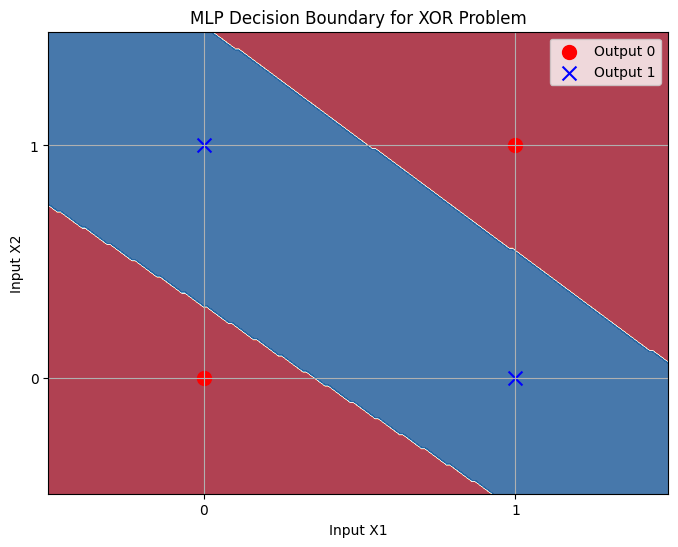

In [25]:
plt.figure(figsize=(8, 6))

# Define the range for the plot
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
h = 0.01 # step size in the mesh

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Prepare the meshgrid points for prediction
mesh_input = np.c_[xx.ravel(), yy.ravel()]

# Forward pass for the meshgrid points
z1_mesh = mesh_input @ W1 + b1
a1_mesh = sigmoid(z1_mesh)
z2_mesh = a1_mesh @ W2 + b2
y_hat_mesh = sigmoid(z2_mesh)

# Convert probabilities to binary predictions (0 or 1)
Z = (y_hat_mesh > 0.5).astype(int)

# Reshape the predictions to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

# Plot the training points (XOR inputs) and their actual labels
plt.scatter(X[y[:,0] == 0, 0], X[y[:,0] == 0, 1], color='red', marker='o', s=100, label='Output 0')
plt.scatter(X[y[:,0] == 1, 0], X[y[:,0] == 1, 1], color='blue', marker='x', s=100, label='Output 1')

plt.title('MLP Decision Boundary for XOR Problem')
plt.xlabel('Input X1')
plt.ylabel('Input X2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.legend()
plt.grid(True)
plt.show()

### Loss Curve

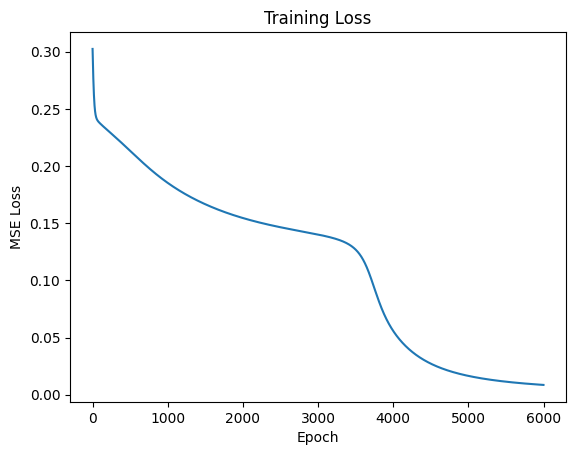

In [26]:
plt.figure()
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()